#Import Library

Import the required libraries during the project.

- Pandas, used to perform data analysis processing
- Matplotlib, is used as a basis for visualizing data
- Seaborn, used on top of matplotlib to do more interesting data visualizations
- Sklearn, used to prepare data before modeling 
- kmodes, used to perform modeling using the K-Prototypes algorithms.
- Pickle, is used to store the model that will be made.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  

#Data Understanding

**Understanding Movie Dataset with knowing features and information about data.**

This dataset has 7 features and 50 rows with variate data types such as int and string. So, it means that there are numeric data and categorical data in this dataset. All cells are also filled with value.

In [ ]:
# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", delimiter="\t")  
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


#Data Exploration

Create a function to display a visualization of numeric data, namely the "Umur" and "NilaiBelanjaSetahun".

This function will display a boxplot visualization of the two columns along with their mean, median, and standard deviation using the seaborn library.

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

<Figure size 432x288 with 0 Axes>

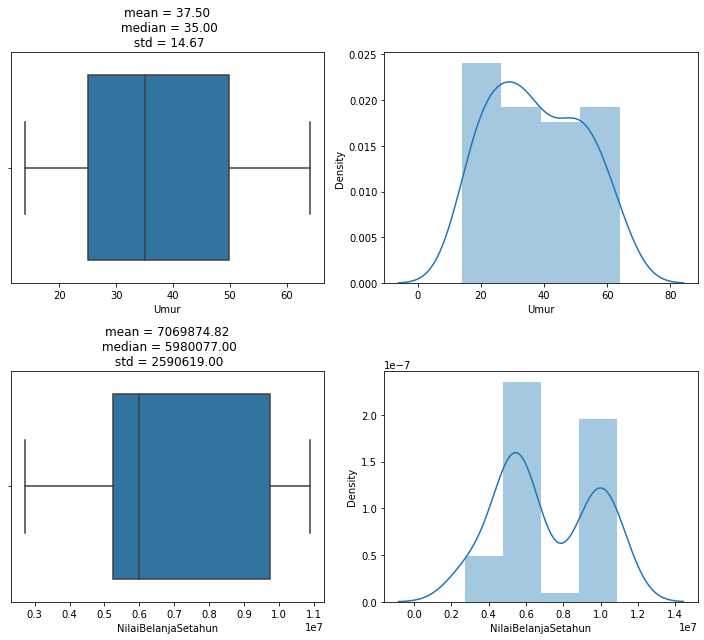

In [ ]:
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

Create a function to display a visualization of categorical data, namely the "JenisKelamin", "Profesi" and "TipeResiden" columns.

This function will display a barchart visualization of the three columns which will calculate the total of all values using the seaborn library.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

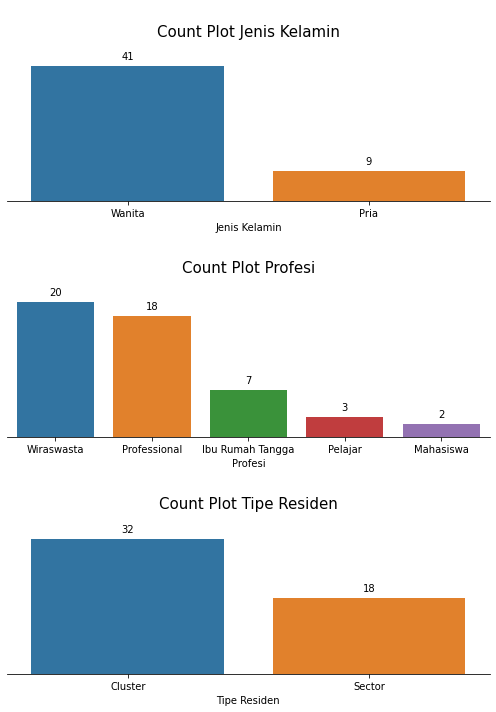

In [ ]:
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

From this visualization it can be concluded that:
- The average age of customers is 37.5 years
- The average value of a customer's annual shopping is 7,069,874.82
- Gender of customers is dominated by women (wanita) as many as 41 people (82%) and men (pria) as many as 9 people (18%)
- Most professions are Entrepreneurs (wiraswasta) (40%) followed by Professionals (profesional) (36%) and - others (24%)
- Of all customers, 64% of them live in Clusters and 36% live in Sectors

#Data Preparation

Standardize numeric data using **StandardScaler()** from the sklearn library so that the numeric data has the same scale and no one dominates.

In [ ]:
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


Encoding categorical data using **LabelEncoder()** from the sklearn library so that the categorical data it has becomes numeric data so it can be used in modeling.

In [ ]:
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode)

    Jenis Kelamin  Profesi  Tipe Residen
0               0        4             1
1               1        2             0
2               0        3             0
3               0        3             0
4               1        4             0
5               1        3             0
6               0        4             1
7               0        3             0
8               1        3             1
9               0        3             0
10              1        3             1
11              1        3             1
12              1        4             0
13              0        4             0
14              1        4             0
15              0        3             0
16              1        0             0
17              1        0             0
18              1        4             0
19              1        2             1
20              1        4             0
21              1        3             0
22              0        3             0
23              

In [ ]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


#Data Modeling

To perform customer segmentation, it is necessary to do dataset clustering.

The algorithm that is owned is the k-prototype algorithm. This algorithm was chosen because it can handle a combination of categorical and numeric data. Other clustering algorithms, for example k-means are usually used to cluster numeric data, while k-modes is usually used to cluster categorical data only.

The parameters required for clustering using the k-prototype are the desired number of clusters and also marking which columns are categorical.

To see the elbow method, we can model the preprocessed dataset using the k-prototype algorithm by looking at the cost of each number of clusters.

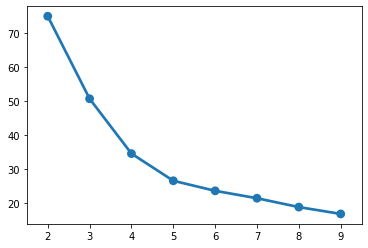

In [ ]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

After looking for the most optimal number of clusters, the result is that the number of clusters is **5**.

So that during the modeling process with the k-prototype algorithm the number of clusters used is 5.

Do the same thing as when making the elbow method. Define the KPrototypes algorithm first and enter the number of clusters. After that, fit the pre-processed dataset with the previously defined k-prototype algorithm.

Save the model using **pickle**.

In [ ]:
kproto = KPrototypes(n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

Next, make predictions for each customer cluster using the dataset used for modeling as well.

Enter the prediction results into the initial dataset by adding a new column named **"cluster"**.

In [ ]:
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
df_final.head()

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3


Displays customer data in each cluster.

In [ ]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range(0, 5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

#Cluster Analysis Visualization

The dataset that already contains columns with customer segmentation can be analyzed again.

- For numeric columns, namely "Umur" and "NilaiBelanjaSetahun", the visualization is done by displaying a boxplot.
- For categorical columns namely "JenisKelamin", "Profesi" and "TipeResiden", visualization is done by displaying the number of each value using a barchart.

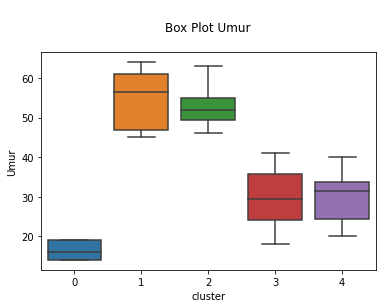

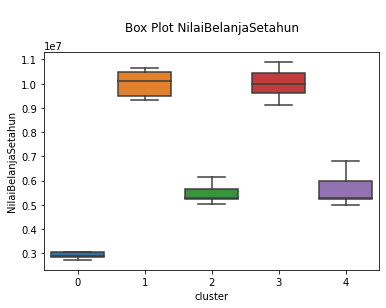

In [ ]:
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

From the boxplot above, it can be concluded that:
- The dominance of elderly customers is in clusters 1 and 2, while clusters 3 and 4 are dominated by adult customers. Cluster 0 is dominated by young customers.
- The highest annual expenditure value is dominated by clusters 1 and 3, while clusters 2 and 4 have a lower annual expenditure value compared to clusters 1 and 3. Cluster 0 is the cluster with the lowest annual expenditure value.

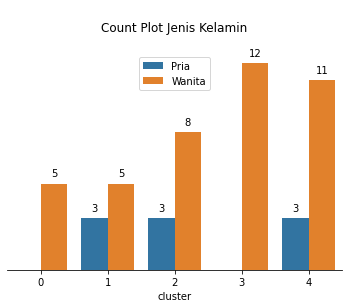

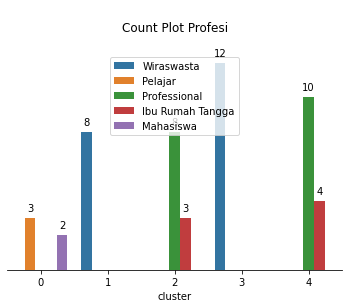

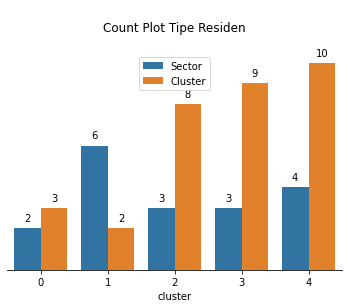

In [ ]:
for i in kolom_kategorikal:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

From the barchart above, it can be concluded that:
- Each cluster is dominated by women (wanita), even cluster 3 does not have a single male (pria) customer.
- Clusters 2 and 4 are dominated by customers with a profession as professionals (profesional), there are also housewives (ibu rumah tangga) in this cluster. Meanwhile, clusters 1 and 3 only have customers who are self-employed (wiraswasta). Then, customers in cluster 0 are students (pelajar dan mahasiswa).
- Clusters 0, 2, 3, and 4 are dominated by customers who live in "Cluster". Meanwhile, more customers in cluster 1 live in "Sektor"

From the cluster results obtained, customers will be re-segmented into categories whose number is the same as the number of clusters. There are 5 categories namely:
- 'Diamond Young Member' for cluster 0
- 'Diamond Senior Member' for cluster 1
- 'Silver Member' for cluster 2
- 'Gold Young Member' for cluster 3
- 'Gold Senior Member' for cluster 4

By mapping using the value in the "cluster" column, we create a new column called "segmen".

The naming of this segmentation is also influenced by the customer data that enters the cluster. For example, for cluster 0, namely Diamond Young Members, it is dominated by students (pelajar dan mahasiswa) whose annual spending value is low and who are also young.

In [ ]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

#Predict New Data


Models that have been stored using pickle can be used to predict new data clusters.

Before making predictions, we need to do the same preprocessing of the new data, namely:
- Converts numeric data to the same scale
- Converts categorical data to numeric

In [ ]:
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 

def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


Make predictions using the saved model by using **pickle.load** to call the model.

In [ ]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  

[1]


The cluster results obtained after making predictions can be used to determine predetermined customer segments.

Define customer segments using the cluster results and add them into the "segmen" column

In [ ]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)  

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
